In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [51]:
n = 10 #nb des noeuds
k = 100  #nb des itérations
c = 1

a1 = 30 #longueur de l'espaceAbscisse :  15.96 

ordonnée : 9.89 
b1 = 20 #largeur de l'espace

r_det = ( ((a1**2+b1**2)**(1/2))/5 )*2 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

14.422205101855956
4.8074017006186525


In [52]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    L = L.astype('float')
    for i in range(n):
        for j in range(n):
            L[i][j] = L[i][j]/degre[i]
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    #A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)
    A = np.multiply(H,W)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    

def mouvement(x,y,A):      
    for i in range(n):
        for j in range(n):
            x[i] += (x[j]-x[i])*A[i][j]
            y[i] += (y[j]-y[i])*A[i][j]
            
    return x,y


# Initialisation

In [65]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]

y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

In [66]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)



 matrice de priorité 
 [[0.14143245 0.09776369 0.18644668 0.12558507 0.08265633 0.11825325
  0.00374288 0.05881036 0.128741   0.05656828]
 [0.12479044 0.08657751 0.02735509 0.06022954 0.11508802 0.11930976
  0.11596847 0.13189512 0.1316735  0.08711255]
 [0.13117423 0.05377818 0.06377164 0.1304978  0.11795469 0.10298633
  0.01466425 0.13453001 0.10450104 0.14614185]
 [0.03234654 0.18789692 0.03516992 0.13323151 0.02679956 0.18354262
  0.17473585 0.12317598 0.08813062 0.01497048]
 [0.11934004 0.07760764 0.12355405 0.14825041 0.16692569 0.1464402
  0.00200445 0.0615974  0.12491183 0.02936829]
 [0.13635413 0.01422013 0.05233865 0.00484711 0.20770893 0.0586006
  0.09037777 0.24287682 0.18434369 0.00833218]
 [0.03097453 0.11688332 0.10856112 0.04474122 0.17570045 0.11547043
  0.10073808 0.11094615 0.13731626 0.05866844]
 [0.10099811 0.05322125 0.04722287 0.23951476 0.18756725 0.12439174
  0.05767763 0.06451071 0.01471754 0.11017814]
 [0.07381945 0.16486328 0.0894349  0.04252219 0.00584283 

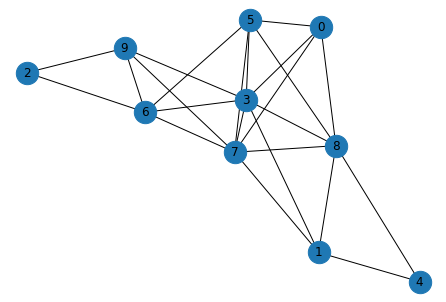

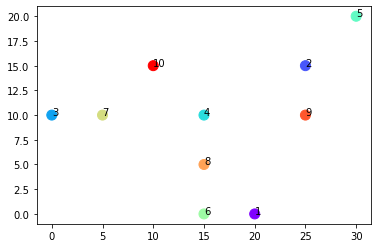

In [68]:
M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)

L = Laplacienne(M)
P = pMatrix(H)
W = randStocastic(n)
A = matriceCom(H,W)

print("\n\n matrice de priorité \n",W)

print("\n matrice adjacence \n", H)


print("\n\n laplacienne \n", L)


print("\n\n P \n",P)

#print("\n\n P \n",np.linalg.matrix_power(P,100))


S=W


S = S.sum(axis=0)/n
print("\n\n convergence W \n",S)

#A1 = matriceCom(H,S)
#print("\n\n convergence A \n",A1)

#matrice de communication


print("\n\n matrice de communication :\n", A)

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))

In [64]:
C = np.copy(np.array(M))
facteur=np.sum(M,axis=1)
    
I = np.identity(len(M[0]))
P1 = I - c*Laplacienne(M)

print(Laplacienne(M))

[[ 1.         -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.         -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111  1.         -0.11111111 -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111  1.         -0.11111111 -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111  1.         -0.11111111
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111  1.
  -0.11111111 -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
   1.         -0.11111111 -0.11111111 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111 -0.11111111
  -0.11111111  1.         -0.11111111 -0.11111111]
 [-0.111

# Exp1 : statique avec W

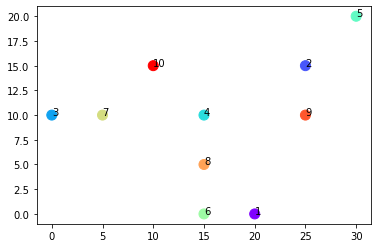

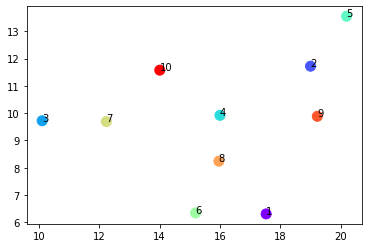

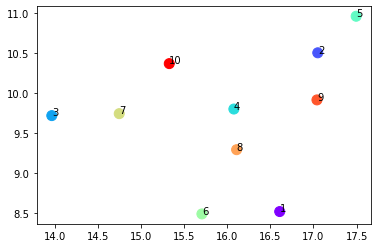

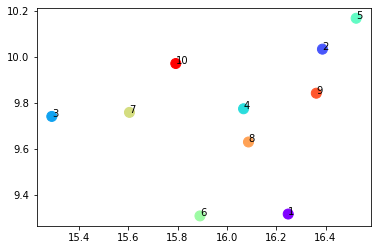

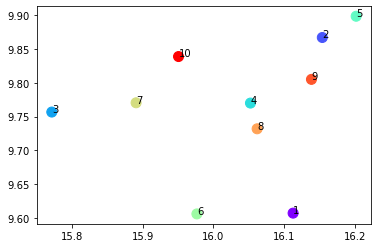

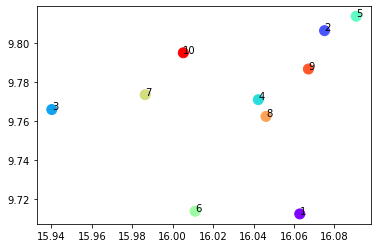

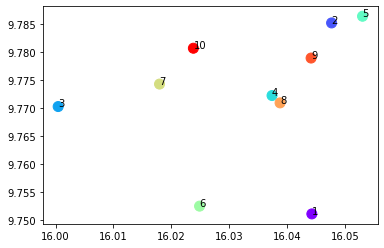

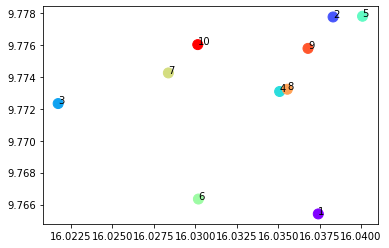

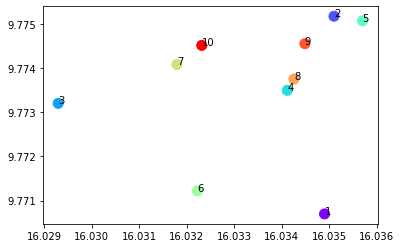

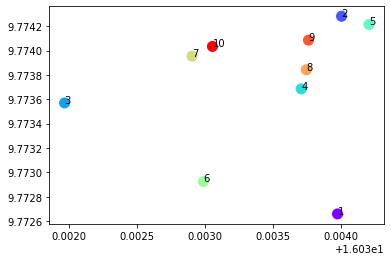

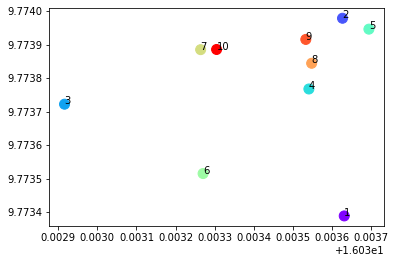

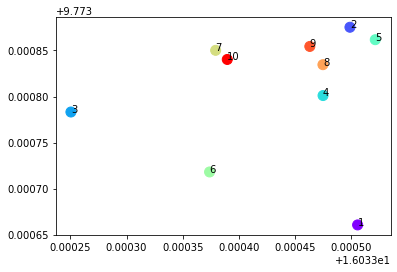

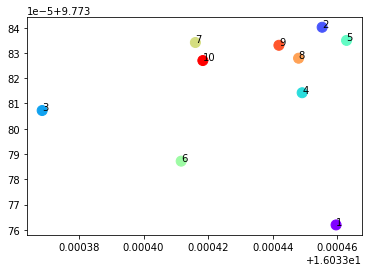

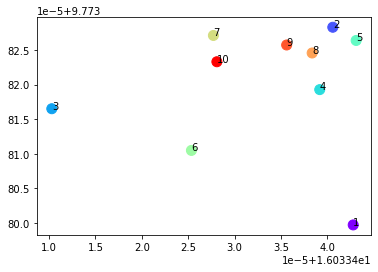

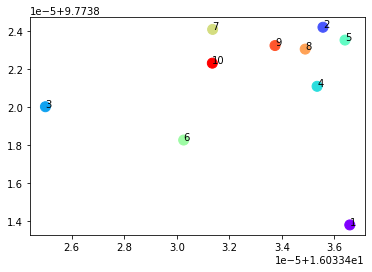

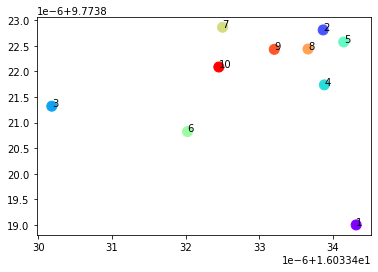

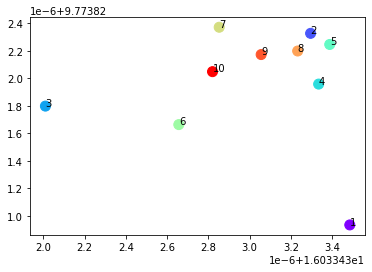

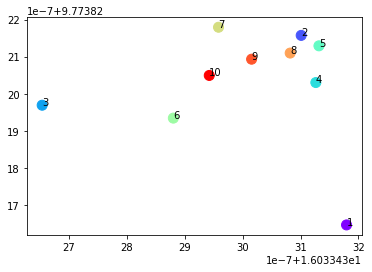

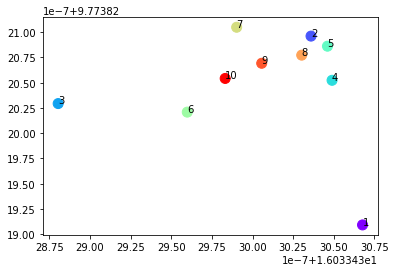

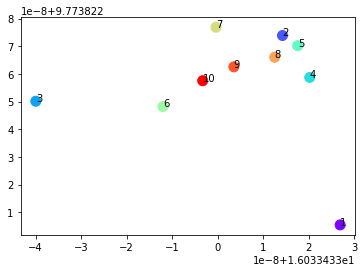

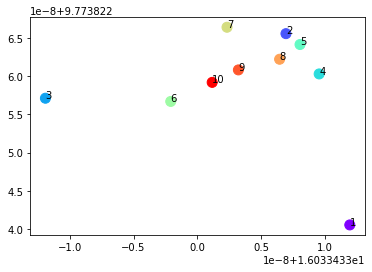

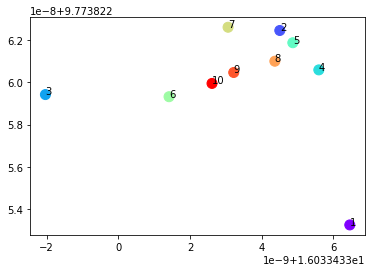

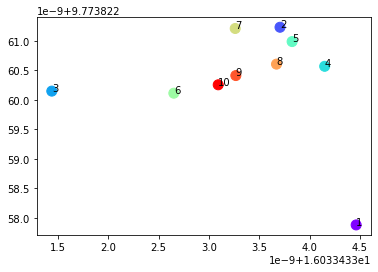

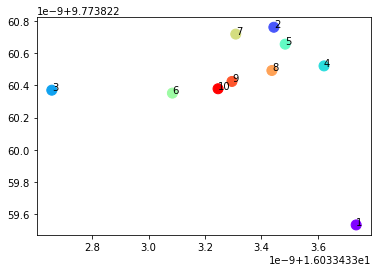

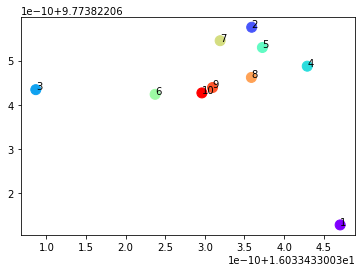

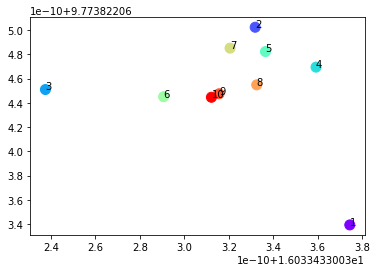

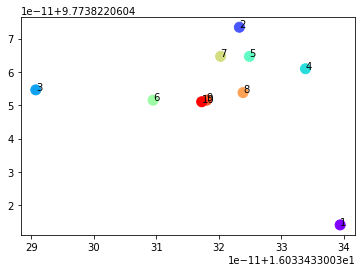

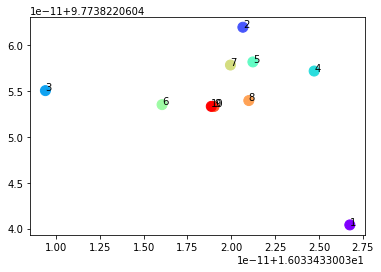

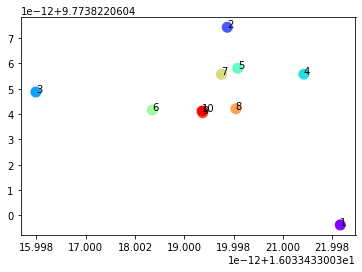

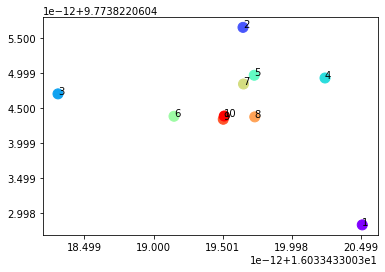

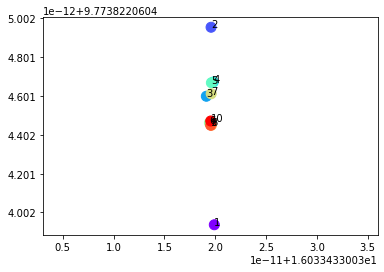

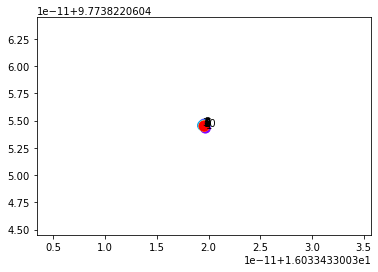

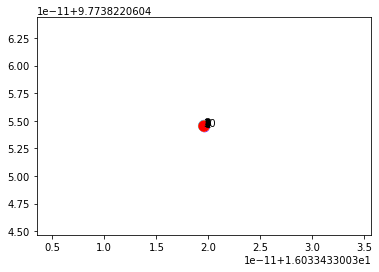

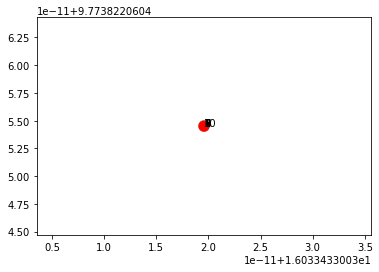

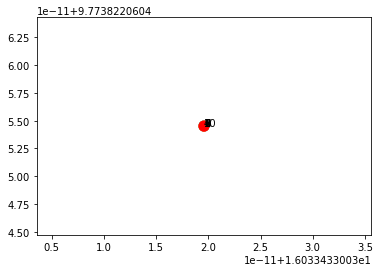

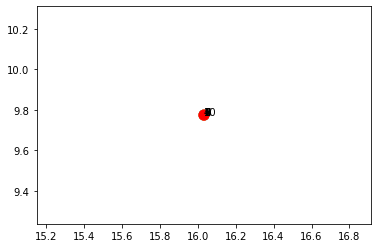

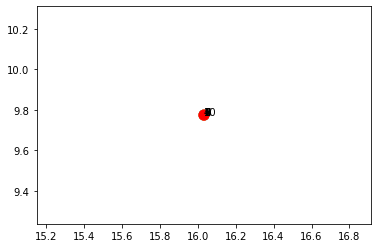

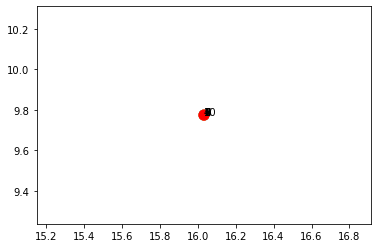

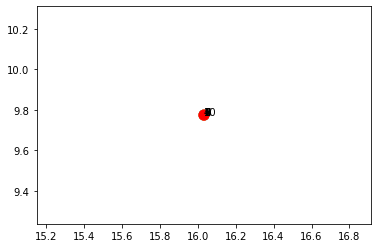

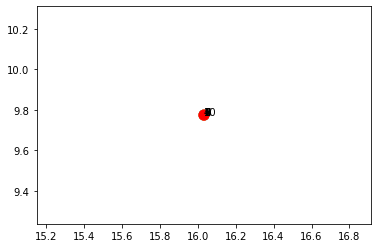

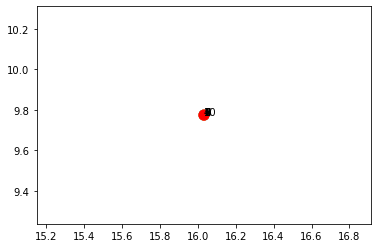

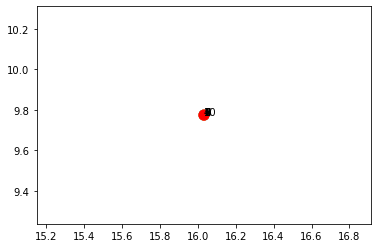

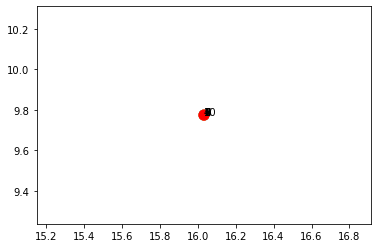

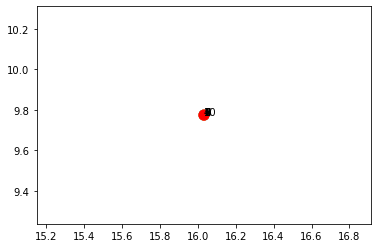

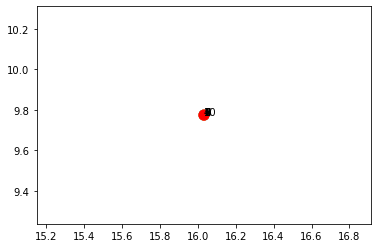

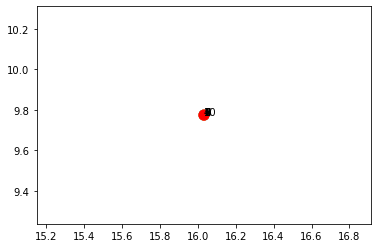

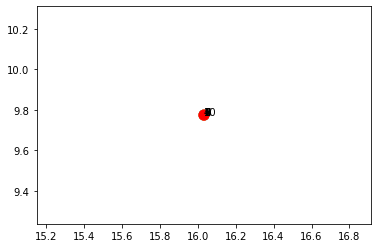

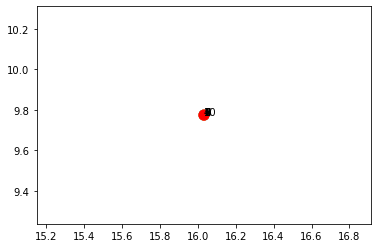

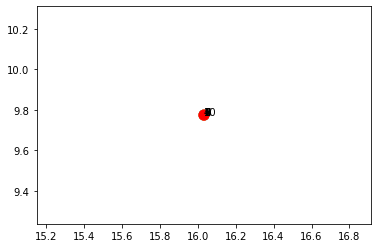

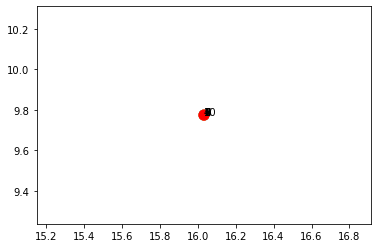

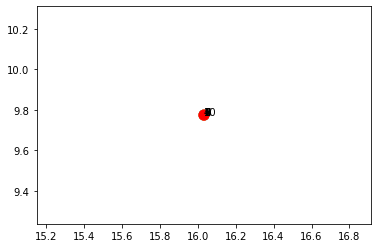

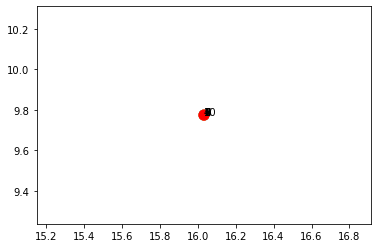

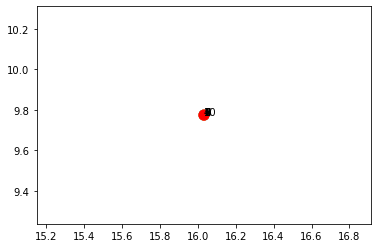

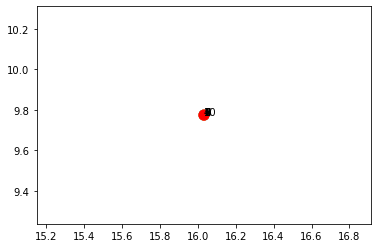

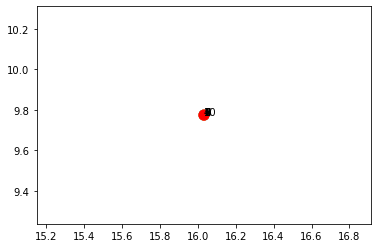

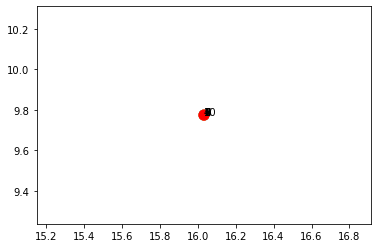

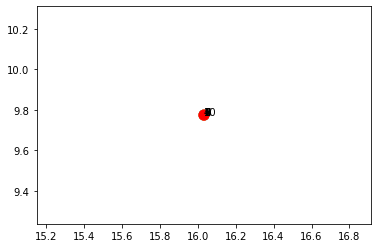

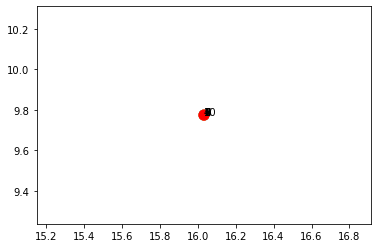

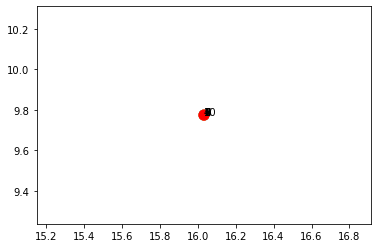

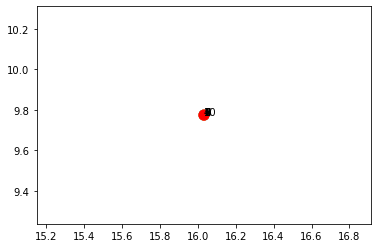

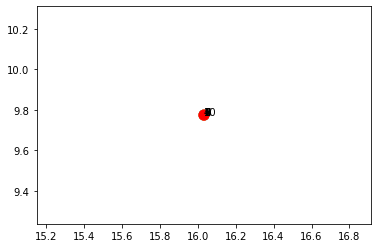

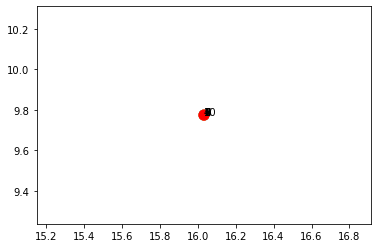

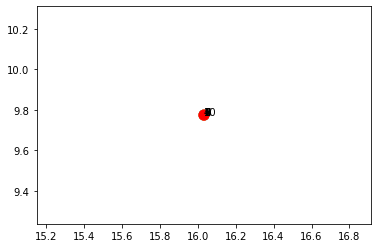

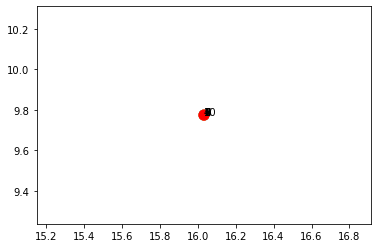

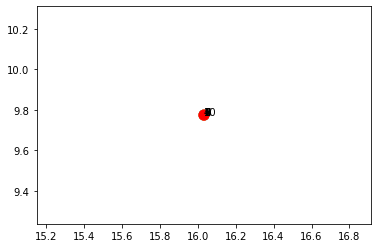

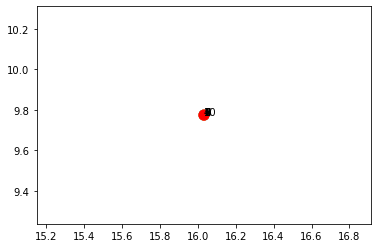

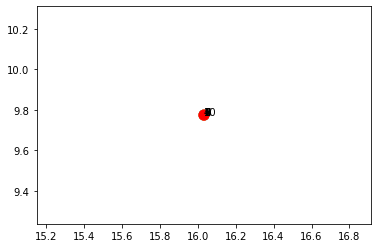

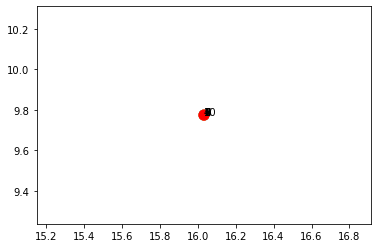

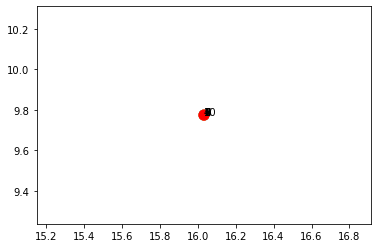

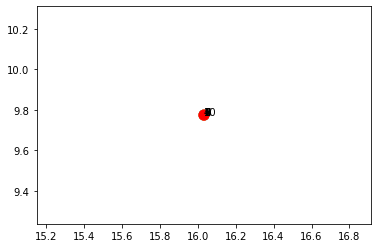

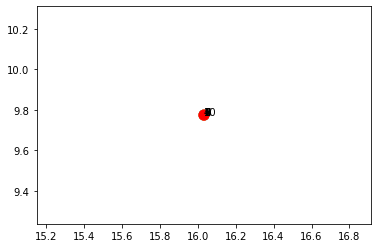

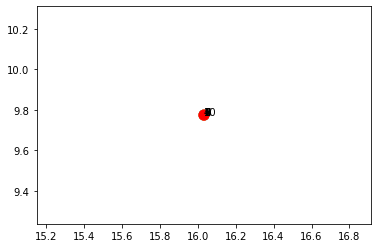

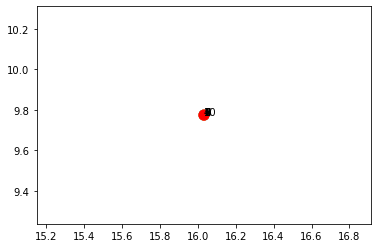

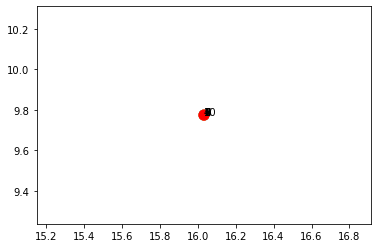

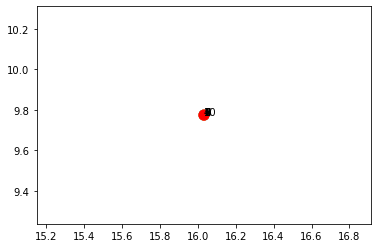

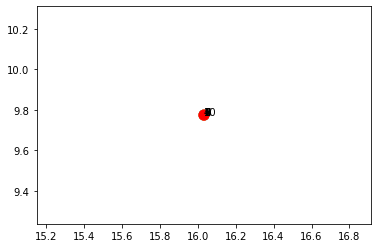

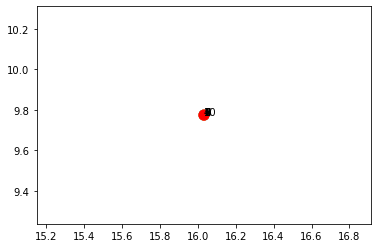

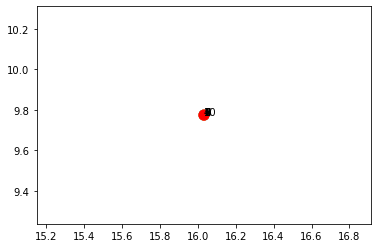

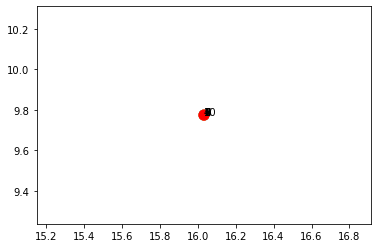

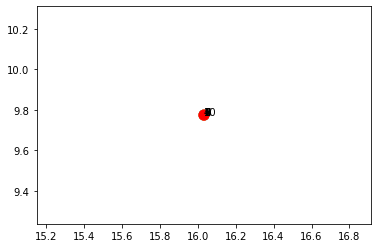

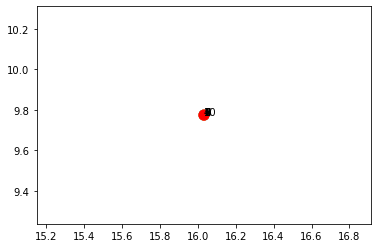

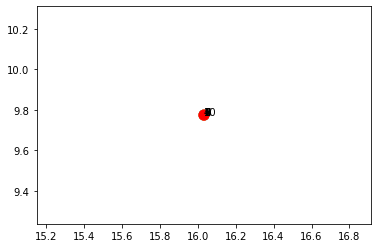

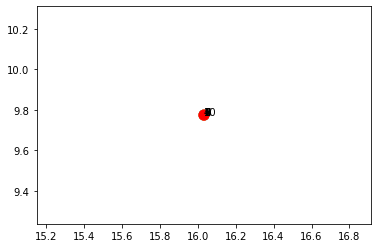

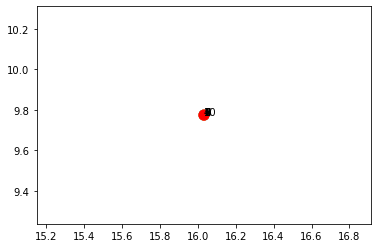

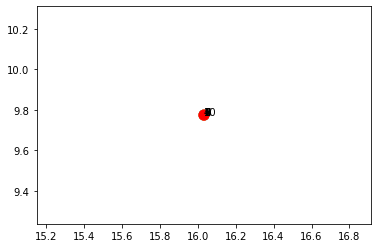

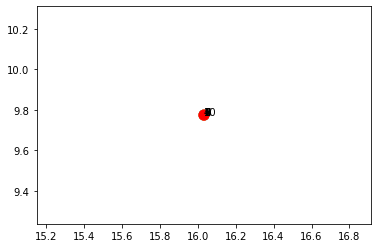

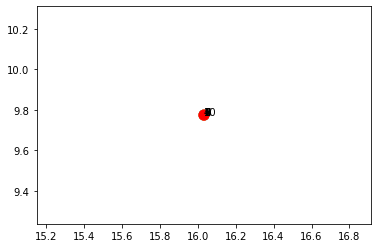

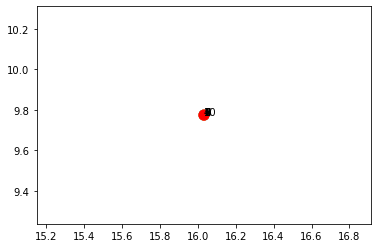

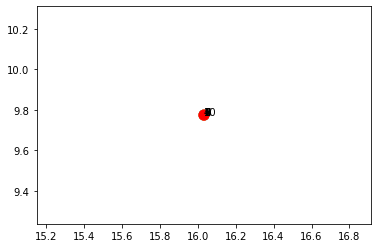

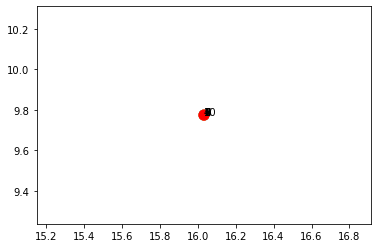

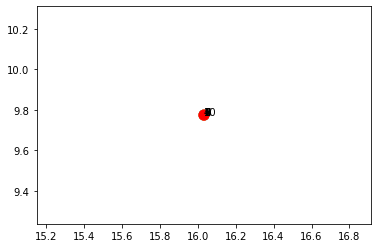

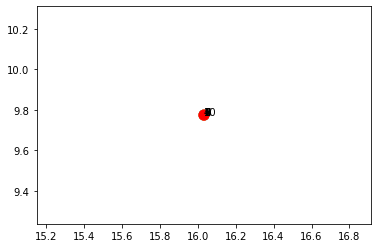

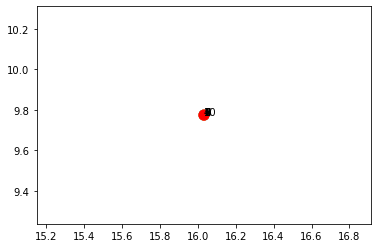

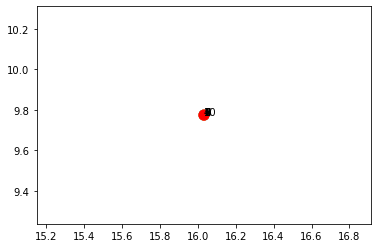

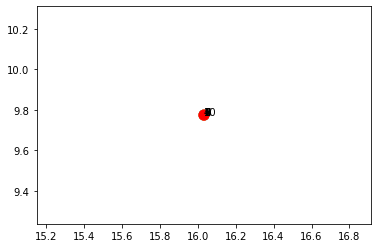

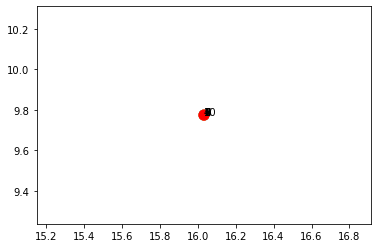

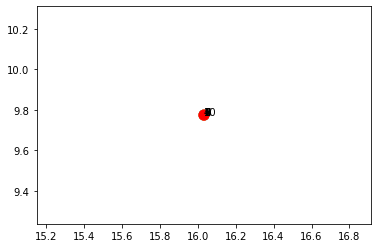

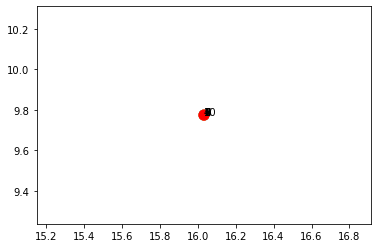

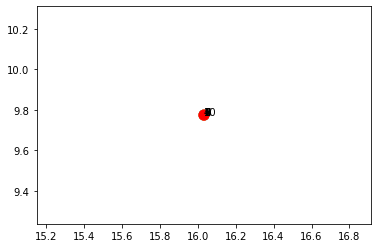

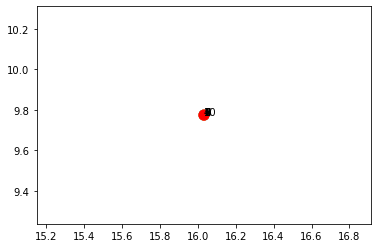



 convergence 
 [0.10879008 0.08958854 0.08655353 0.09817127 0.10903448 0.11355227
 0.07843115 0.11119098 0.11582073 0.08886697]


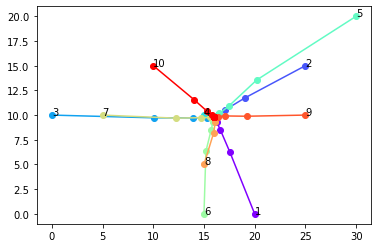

In [69]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    #H = np.array(M).reshape(n,n)
    #P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,W)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

#print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)

anim = camera.animate(blit=True)



In [58]:
Xpre = (a[0]*S).sum(axis=0)
Ypre = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [16.20462631 16.20462631 16.20462631 16.20462631 16.20462631 16.20462631
 16.20462631 16.20462631 16.20462631 16.20462631]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [9.25152965 9.25152965 9.25152965 9.25152965 9.25152965 9.25152965
 9.25152965 9.25152965 9.25152965 9.25152965]


In [59]:
print(a[0].sum(axis=0),b[0].sum(axis=0))

160.0 95.0


# Exp2 statique avec A

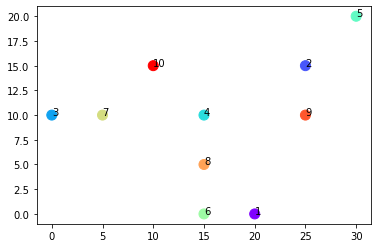

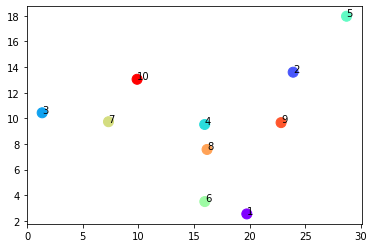

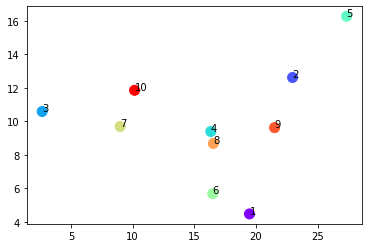

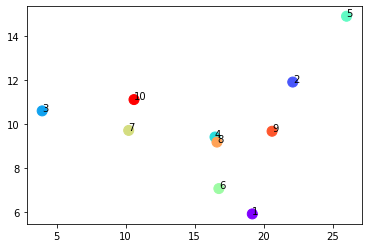

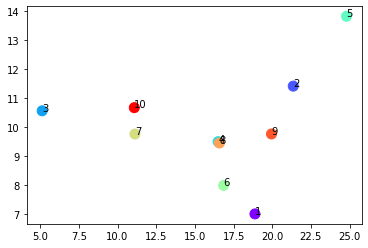

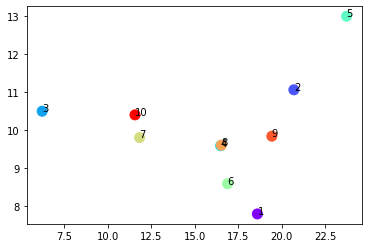

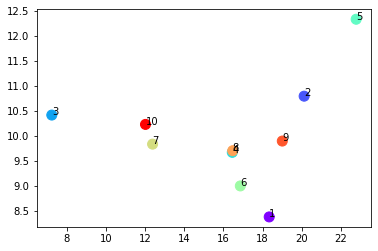

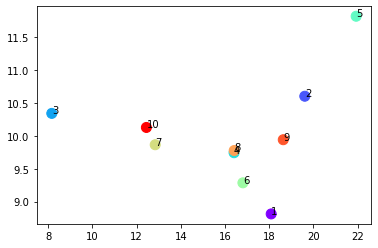

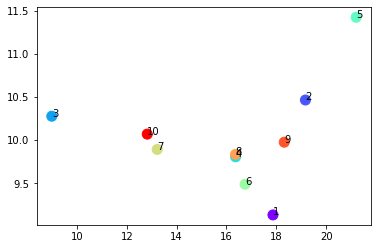

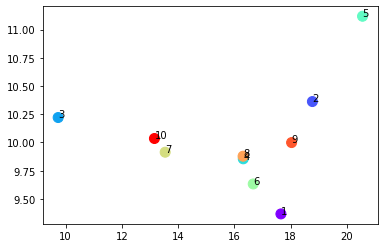

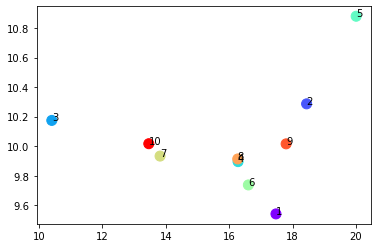

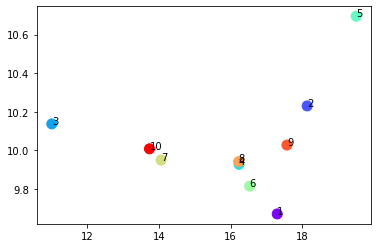

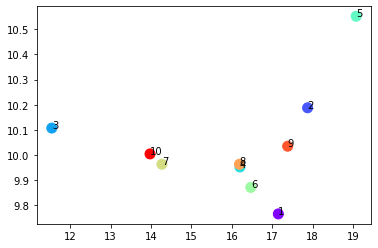

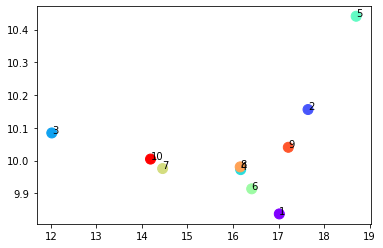

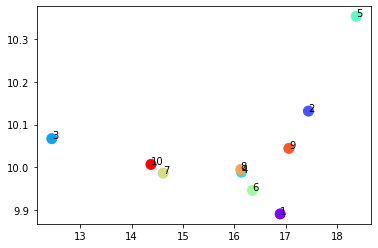

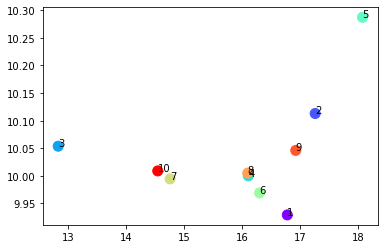

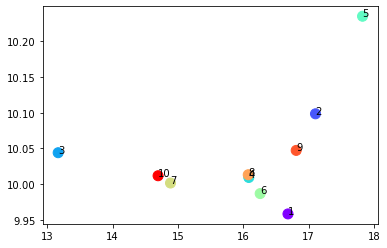

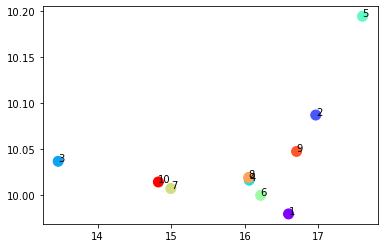

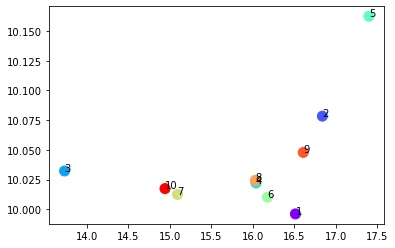

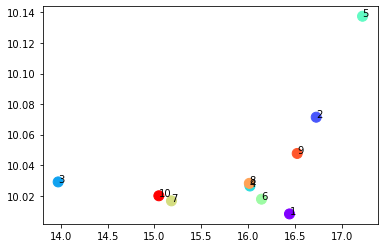

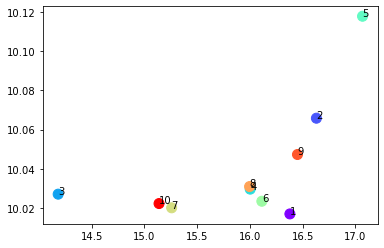

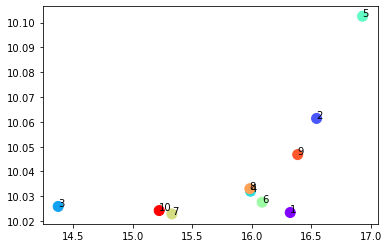

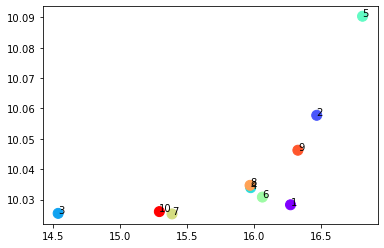

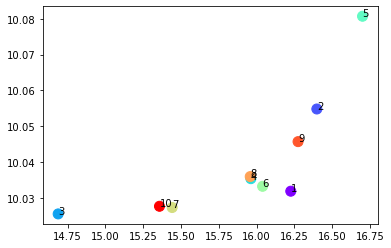

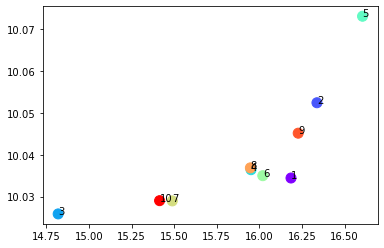

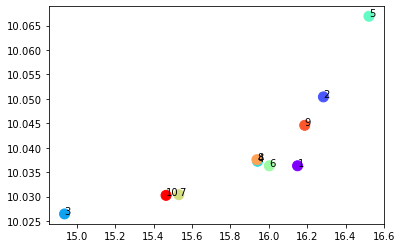

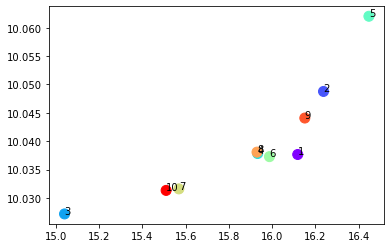

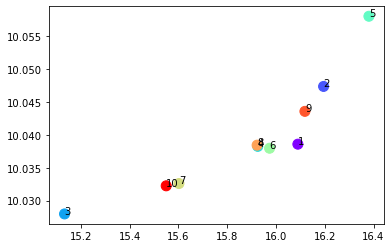

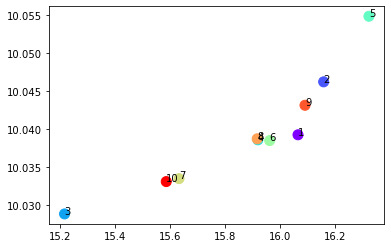

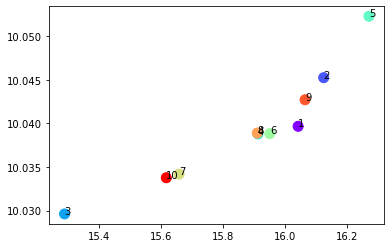

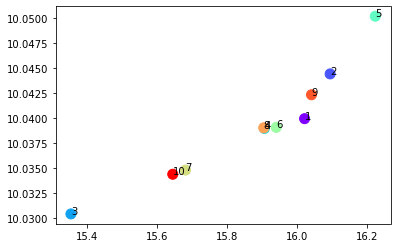

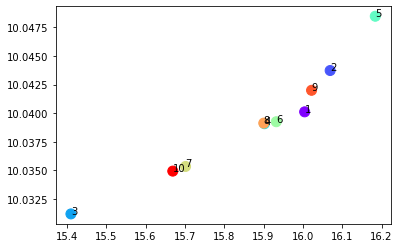

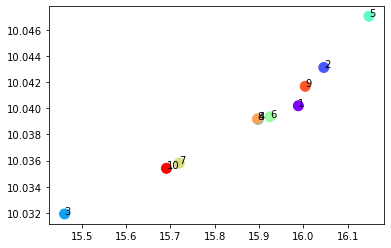

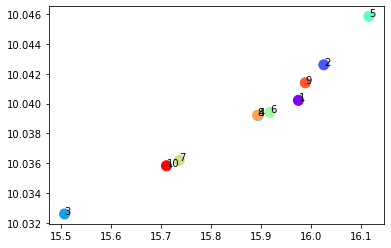

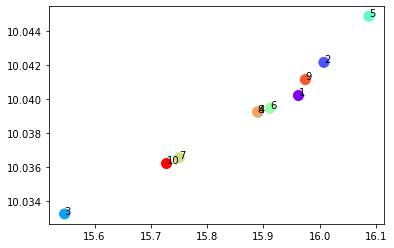

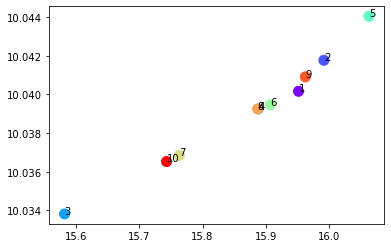

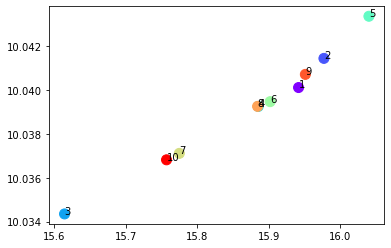

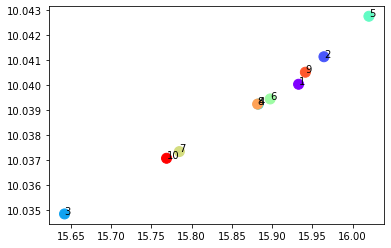

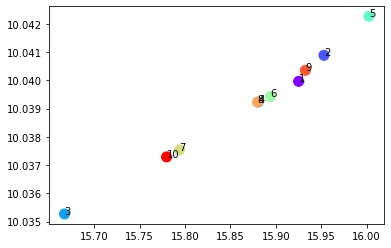

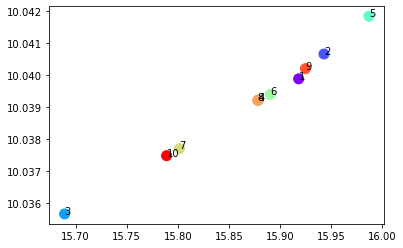

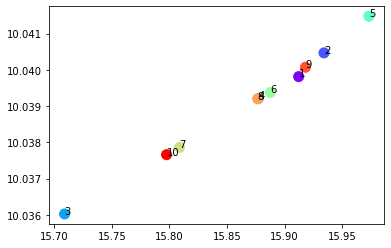

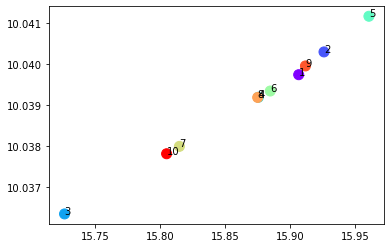

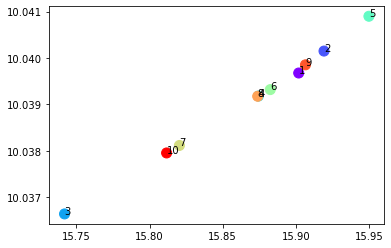

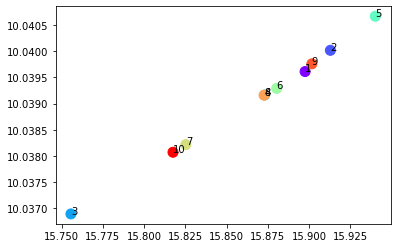

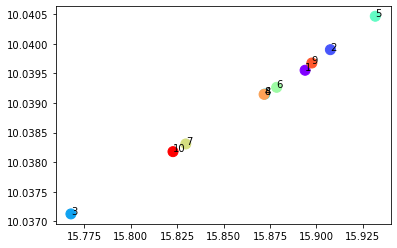

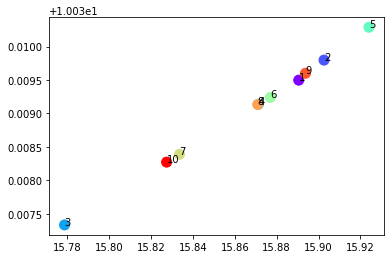

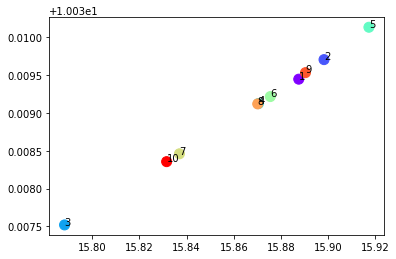

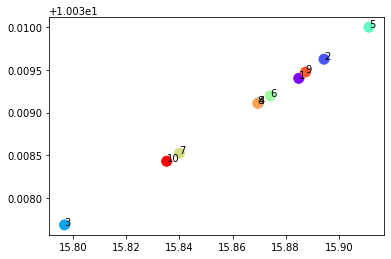

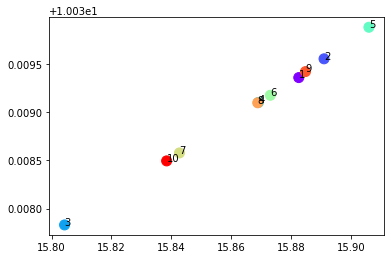

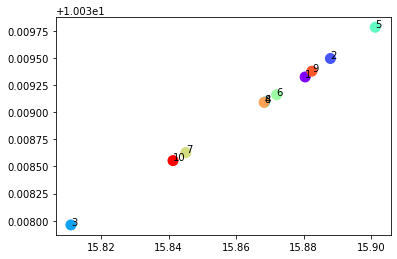

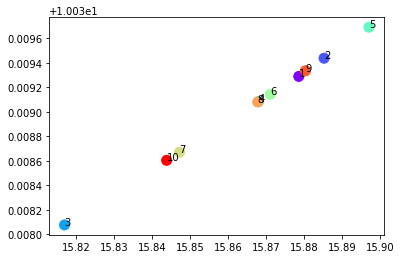

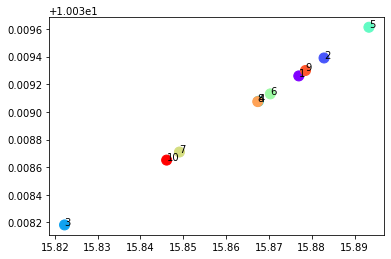

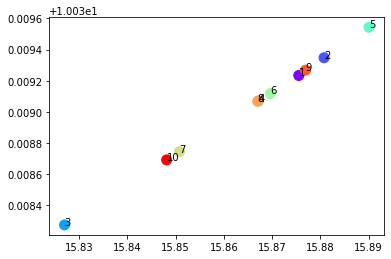

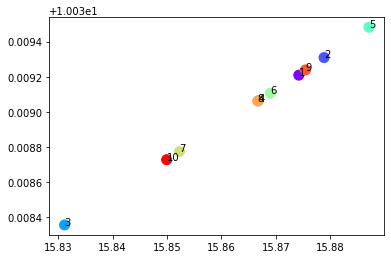

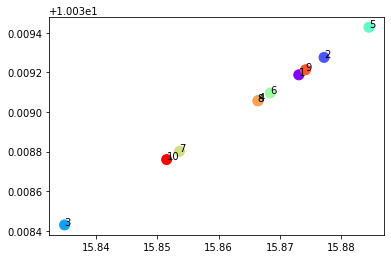

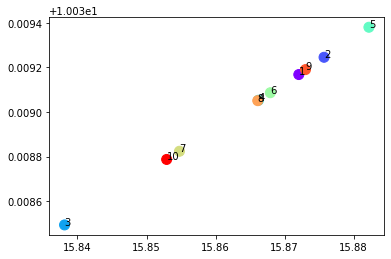

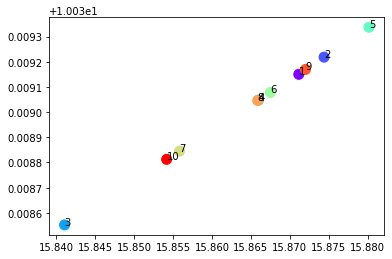

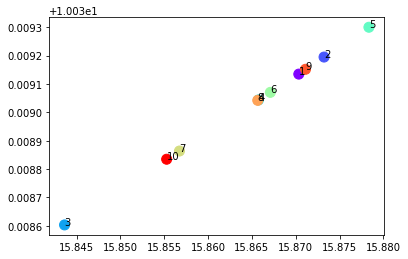

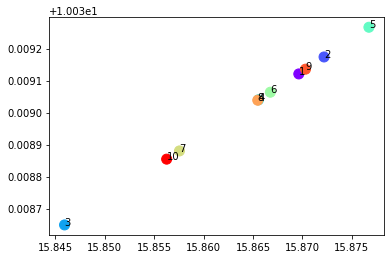

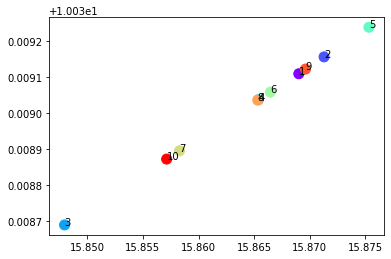

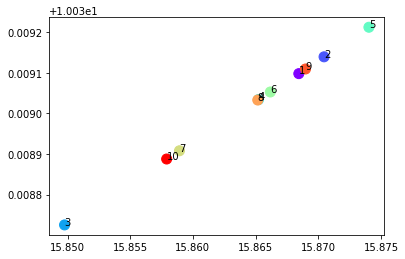

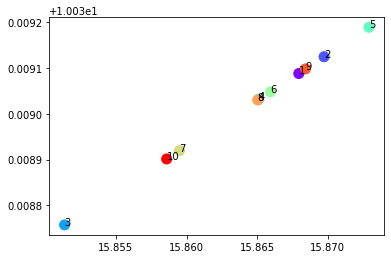

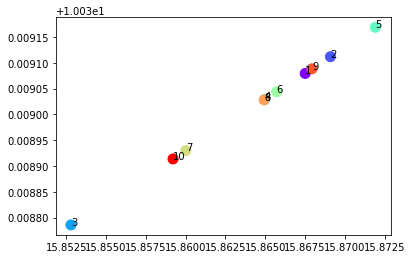

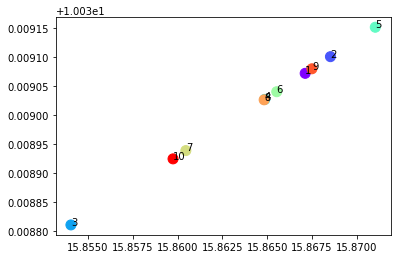

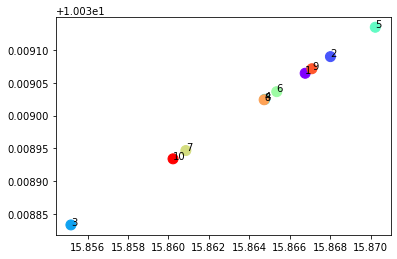

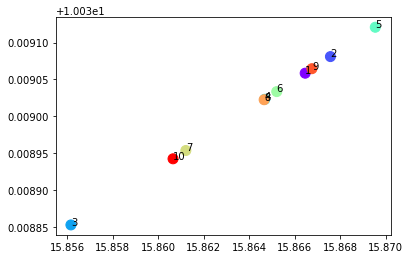

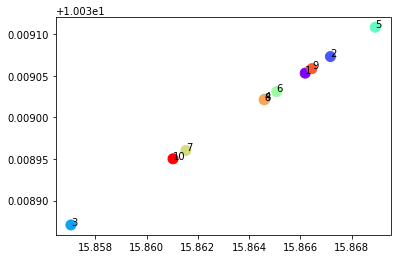

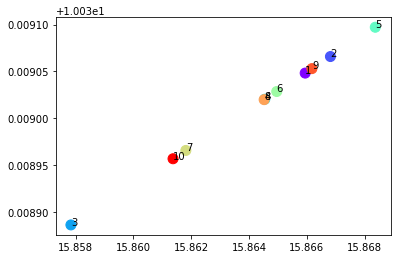

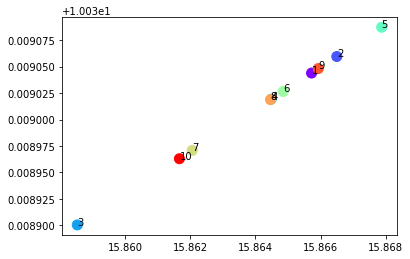

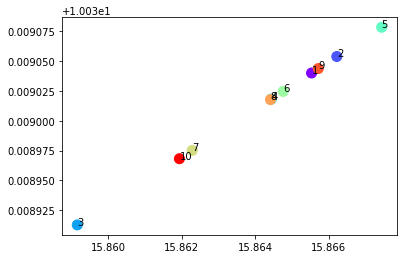

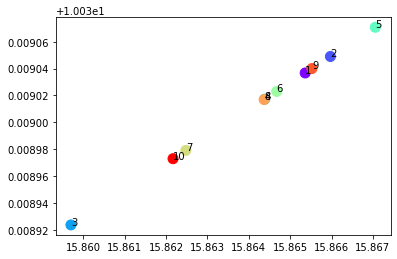

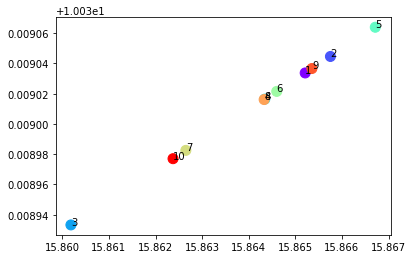

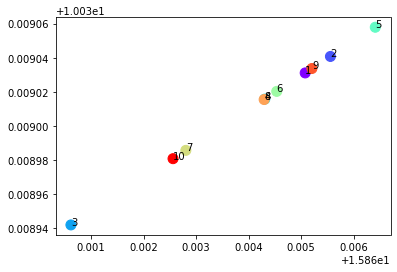

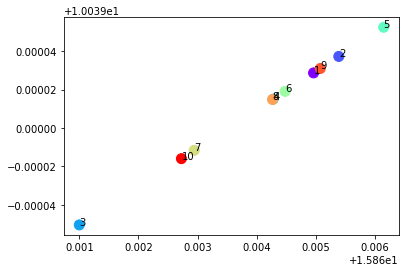

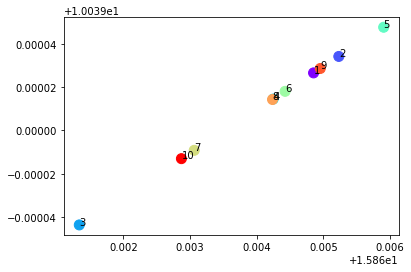

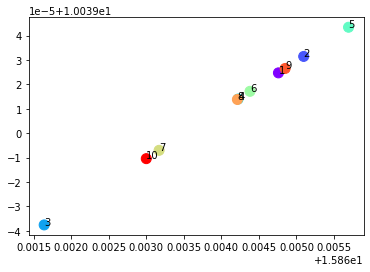

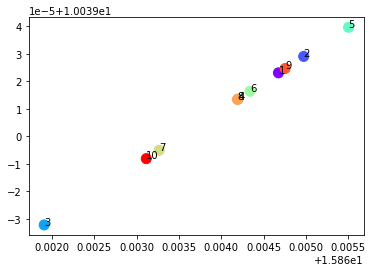

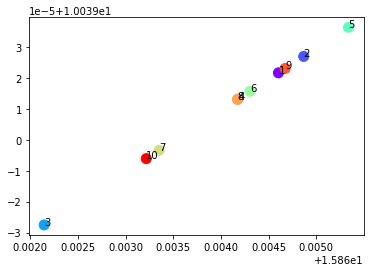

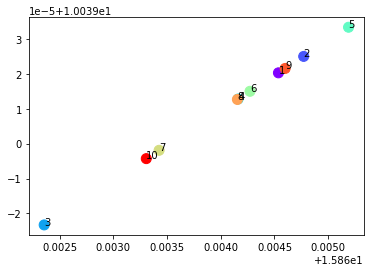

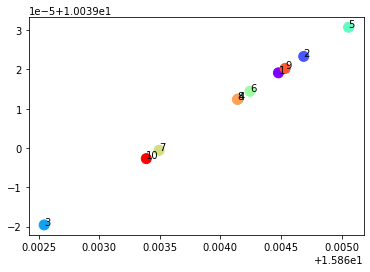

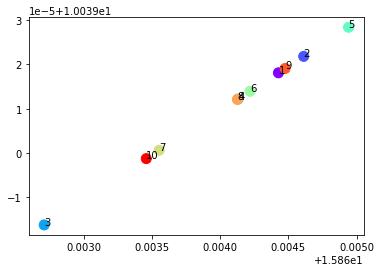

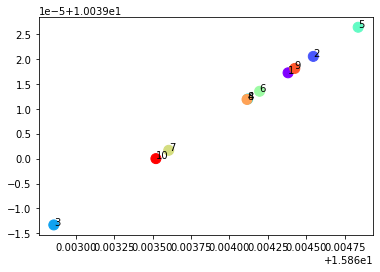

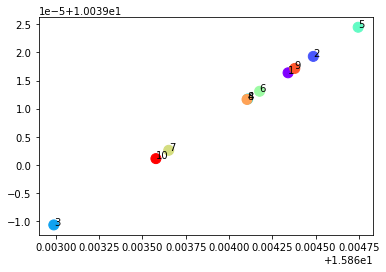

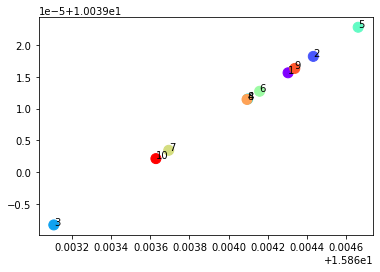

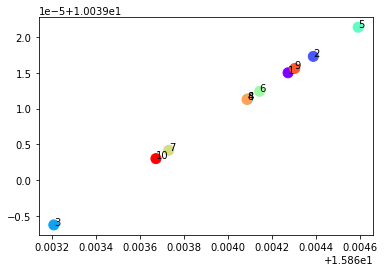

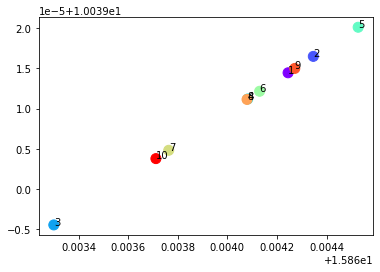

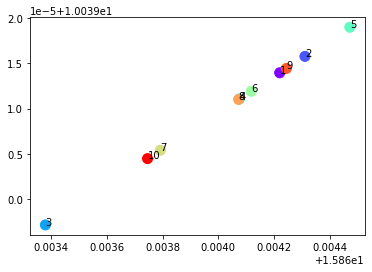

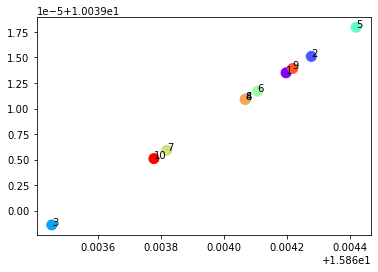

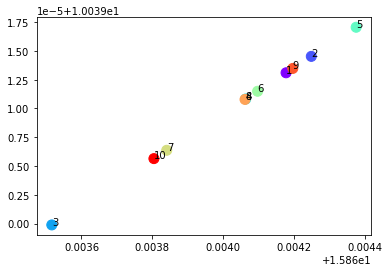

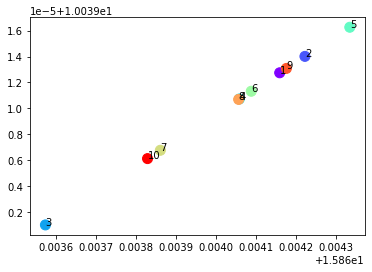

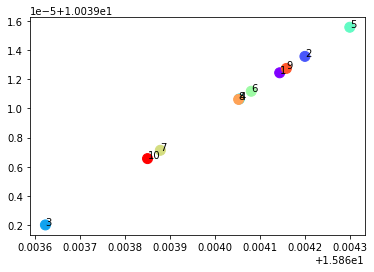

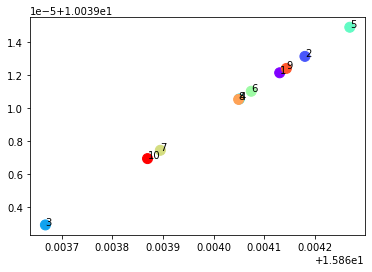

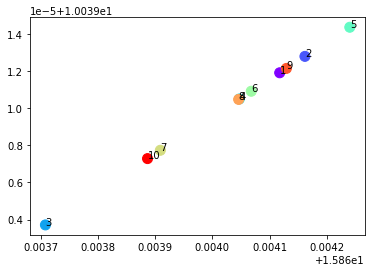

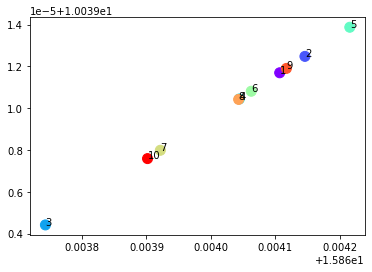

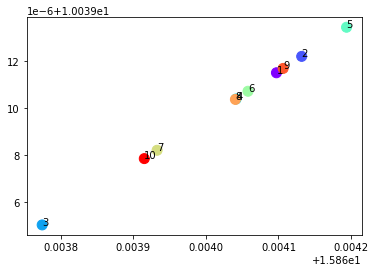

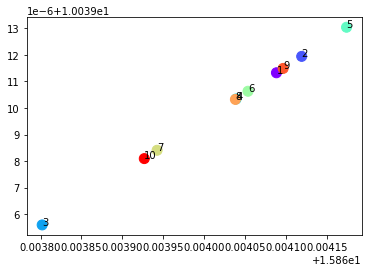

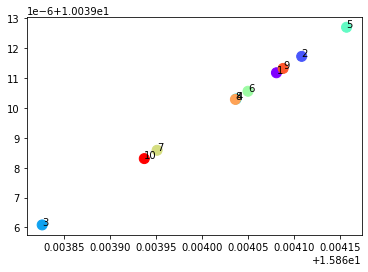

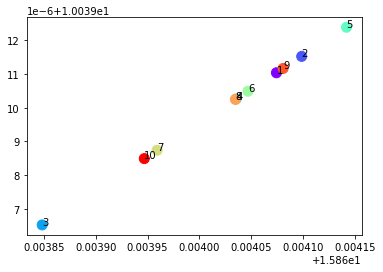

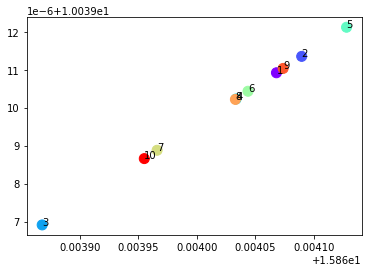

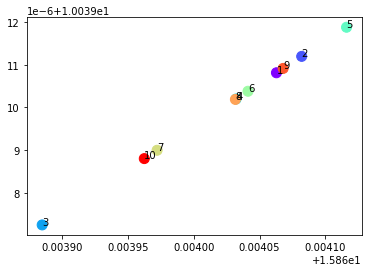



 convergence 
 [0.10949954 0.11134193 0.12330199 0.1052372  0.07483095 0.07762848
 0.09945802 0.07461717 0.14088969 0.08319504]


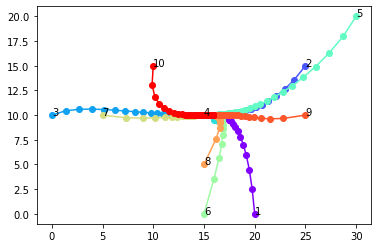

In [60]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)
    
#M = positionToAdjMatrix(x,y,r_det)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    #H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,A)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

#print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)

anim = camera.animate(blit=True)


In [61]:
print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.86406281 15.86408196 15.86388499 15.86403216 15.86411601 15.86404121
 15.86397222 15.86403165 15.8640679  15.8639625 ]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [10.03901081 10.03901119 10.03900725 10.0390102  10.03901188 10.03901038
 10.039009   10.03901019 10.03901091 10.0390088 ]


# Exp2 dynamique avec A

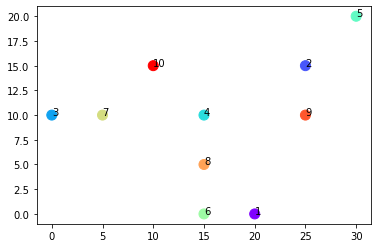

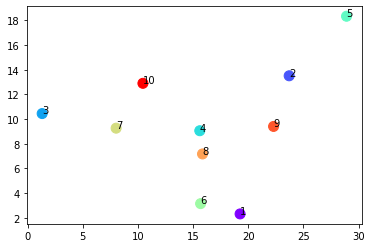

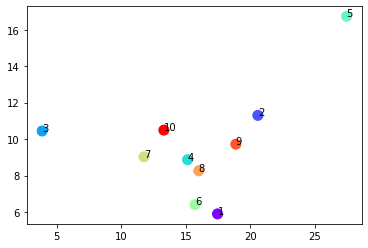

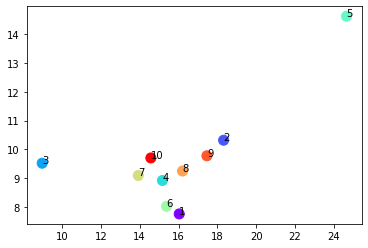

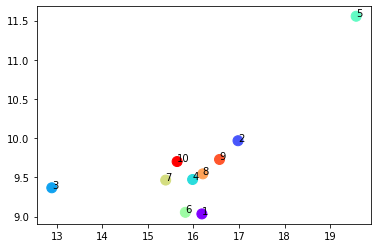

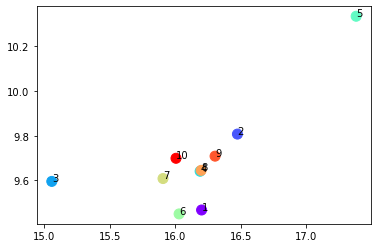

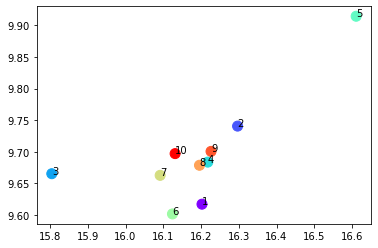

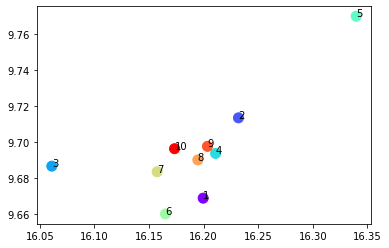

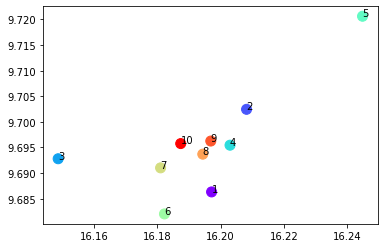

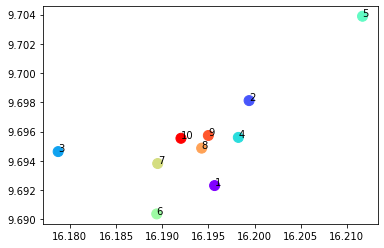

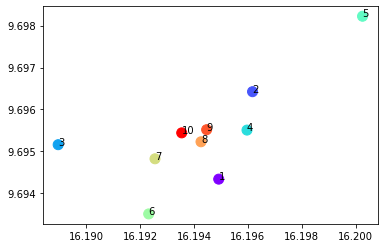

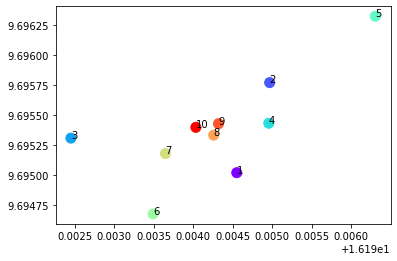

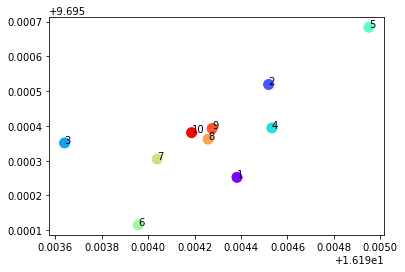

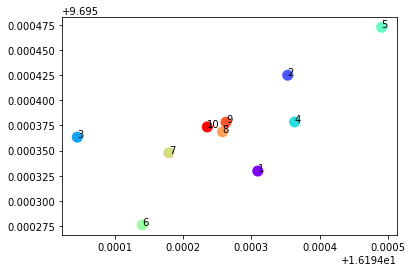

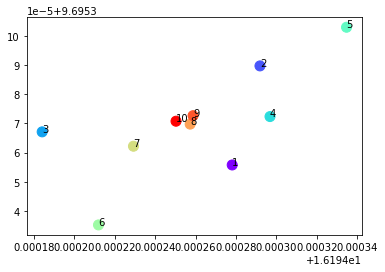

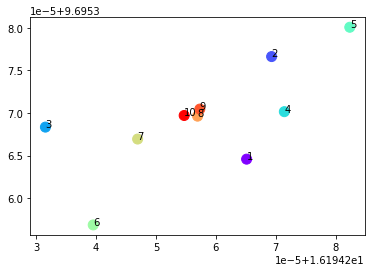

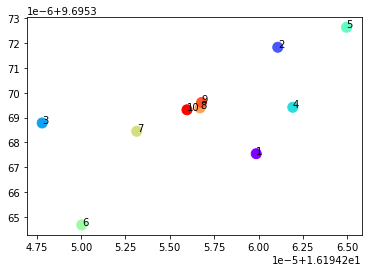

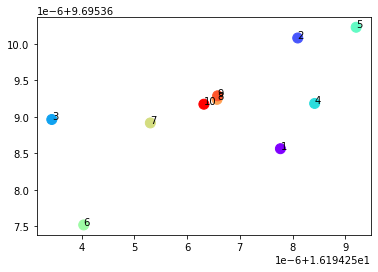

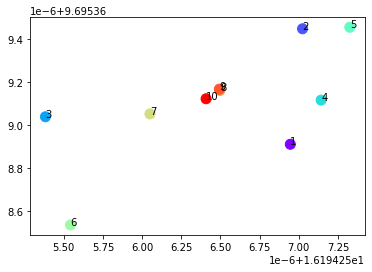

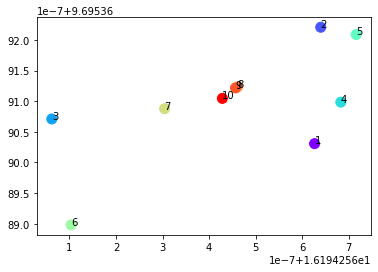

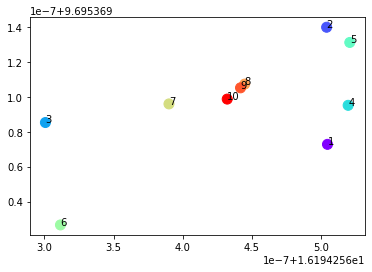

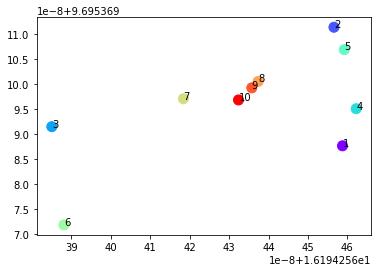

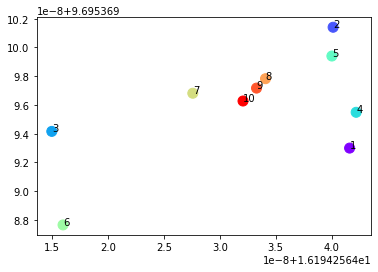

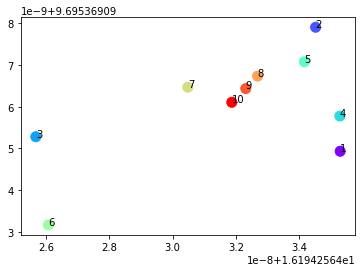

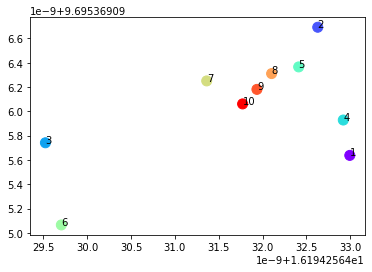

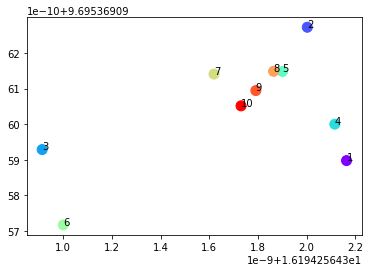

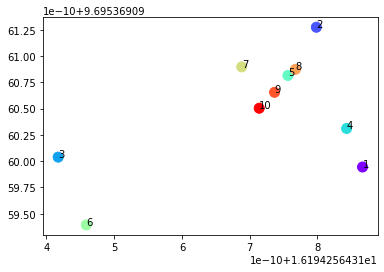

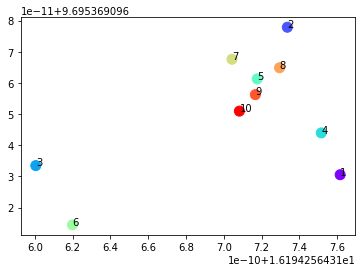

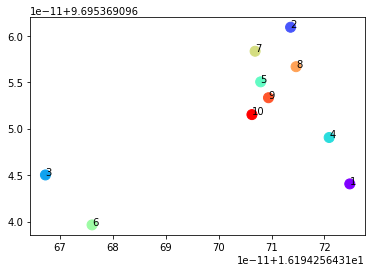

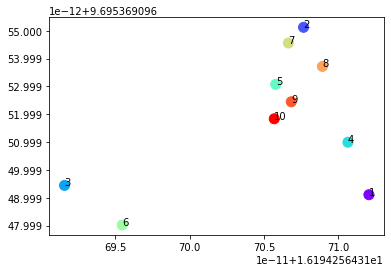

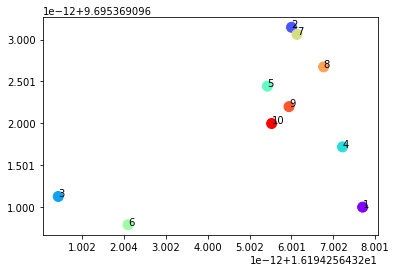

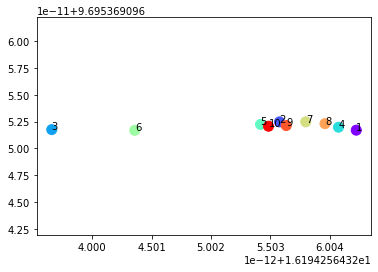

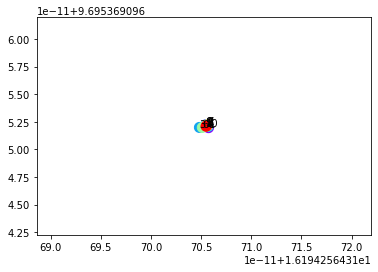

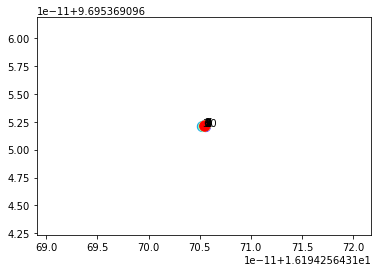

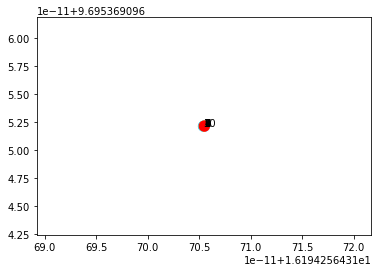

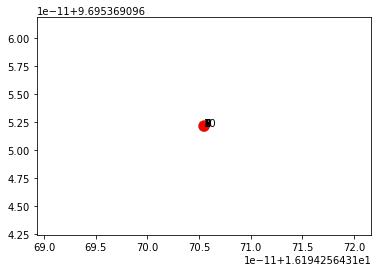

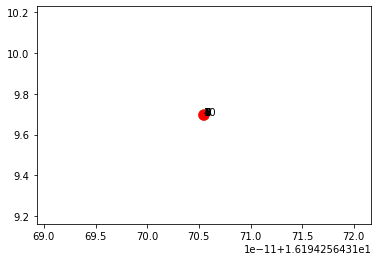

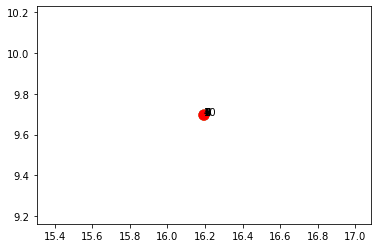

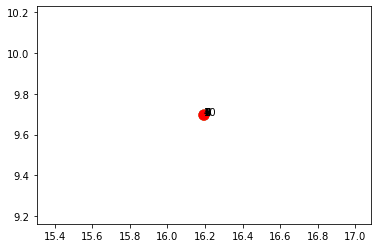

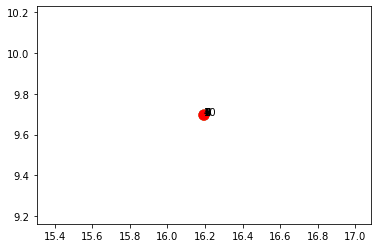

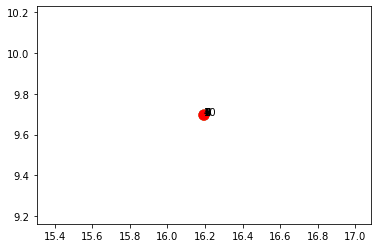

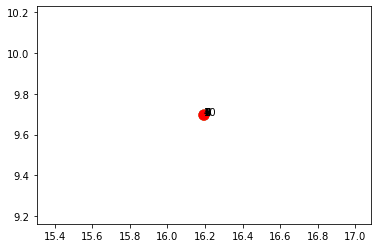

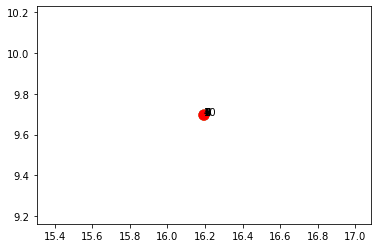

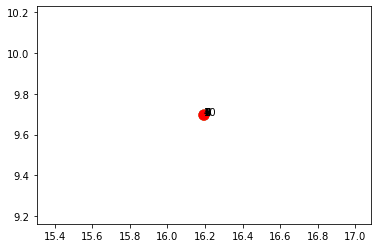

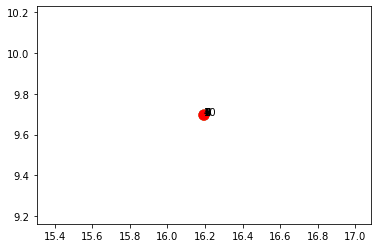

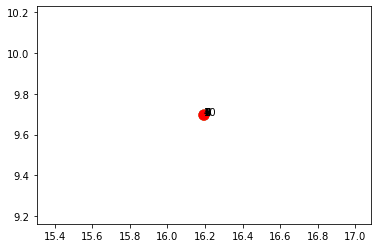

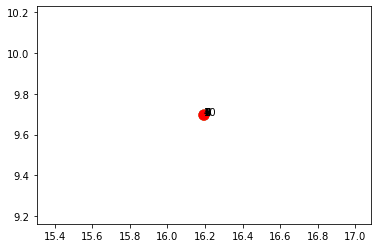

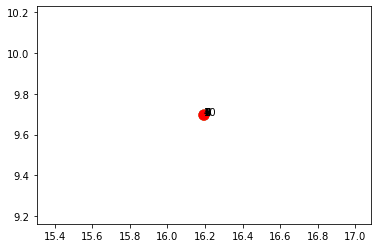

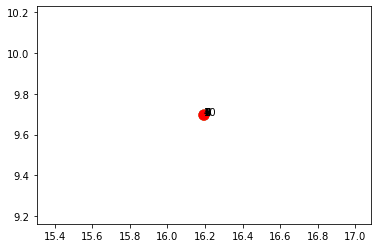

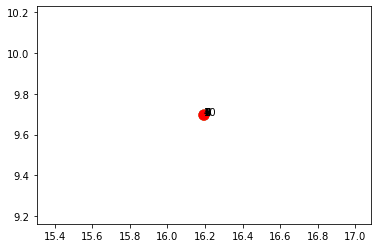

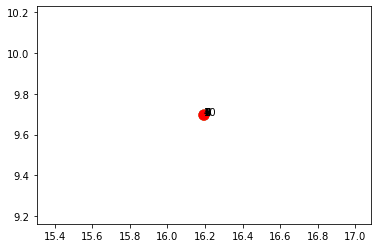

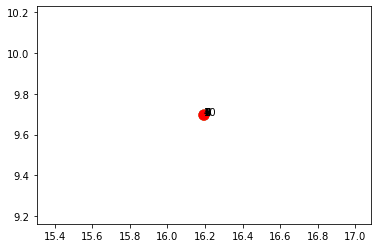

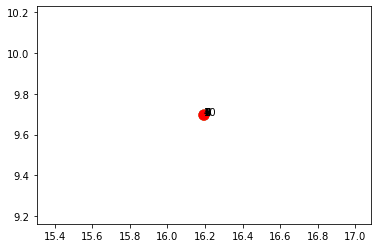

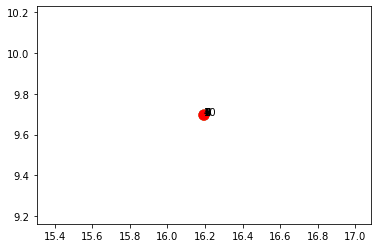

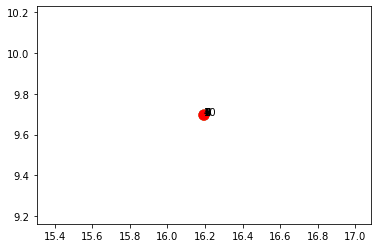

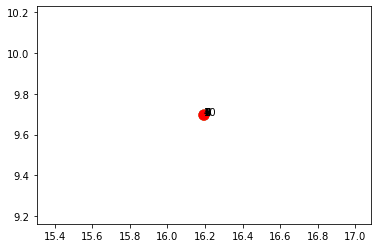

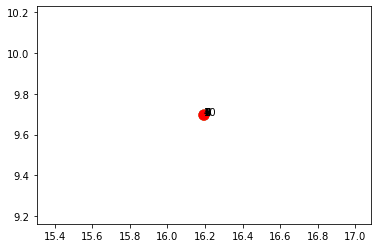

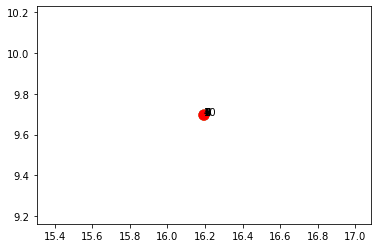

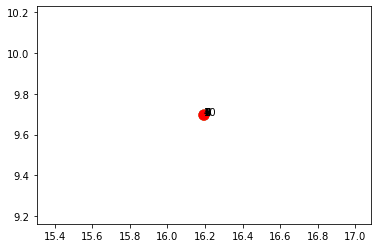

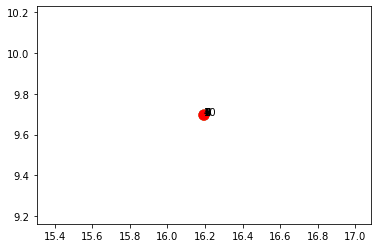

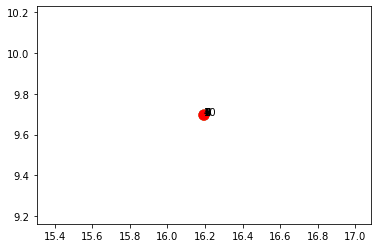

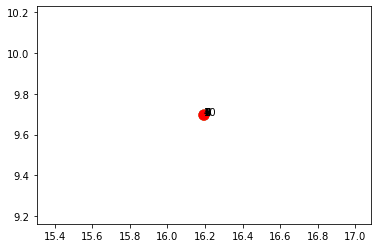

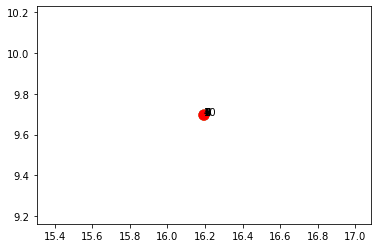

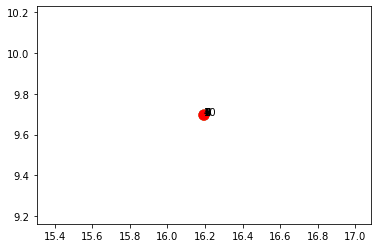

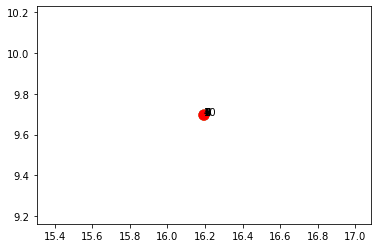

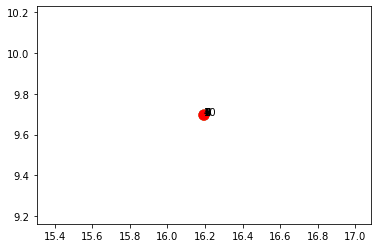

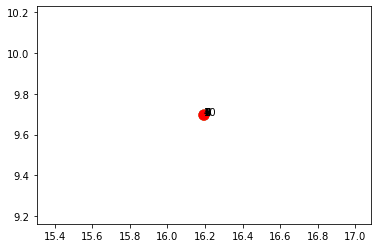

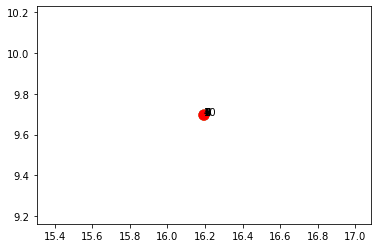

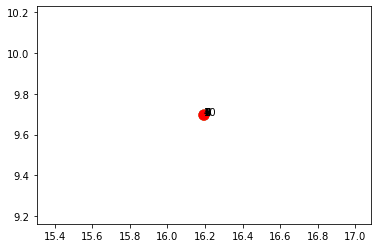

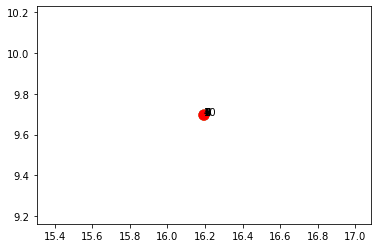

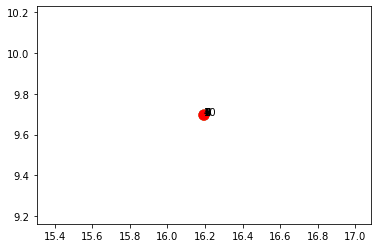

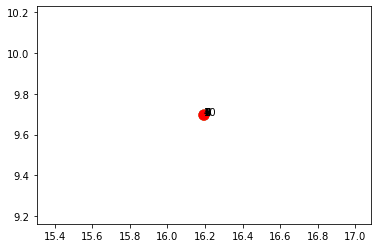

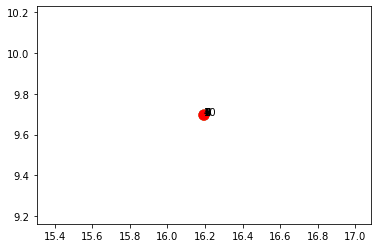

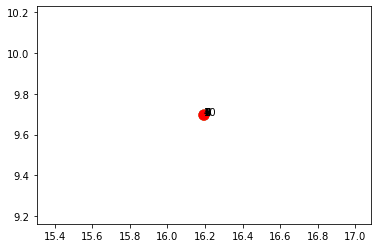

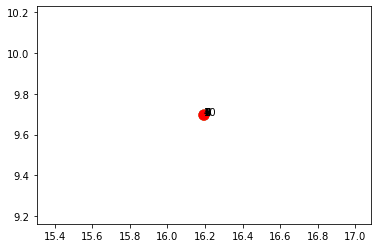

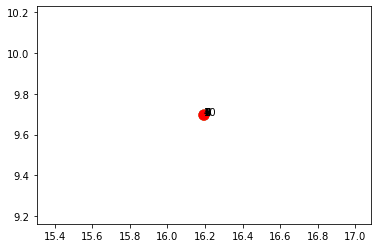

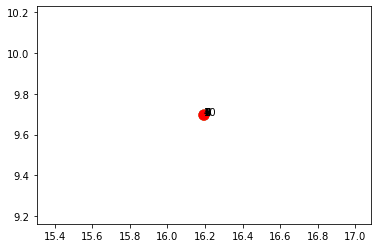

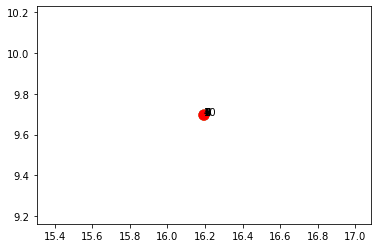

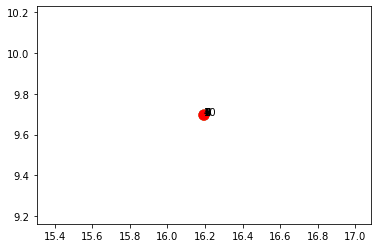

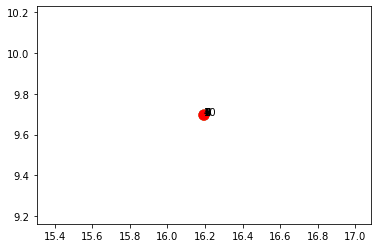

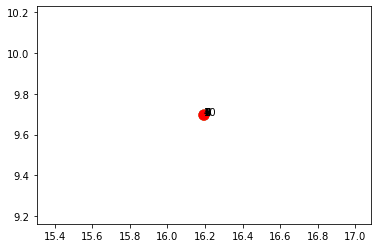

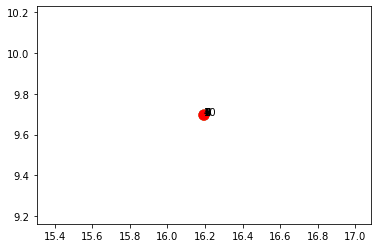

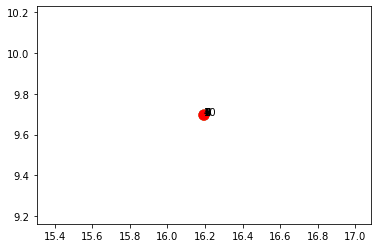

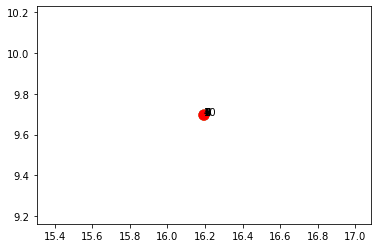

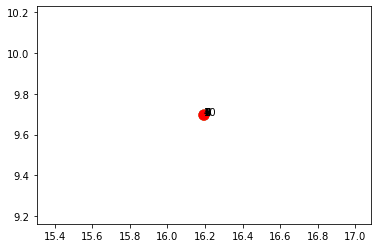

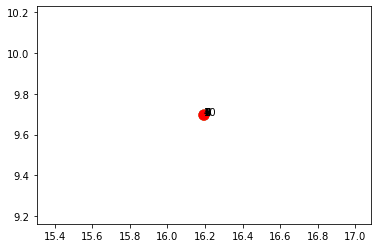

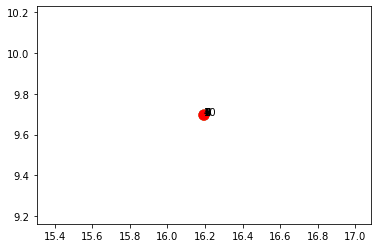

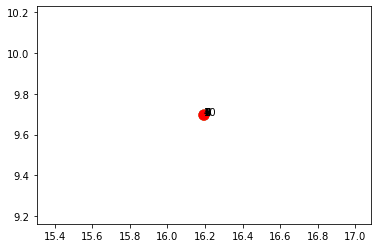

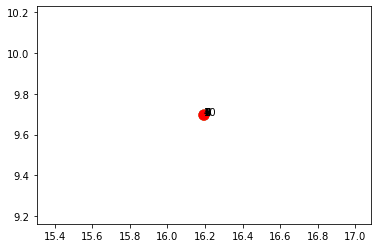

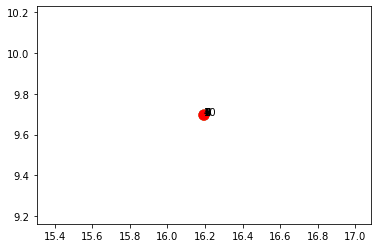

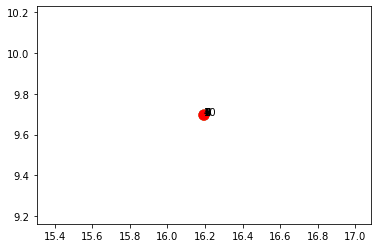

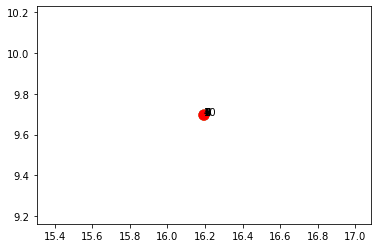

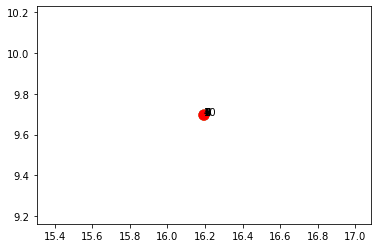

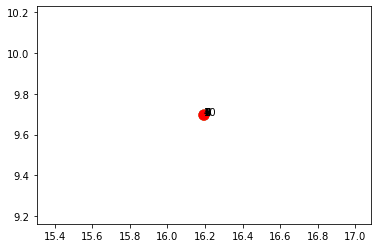

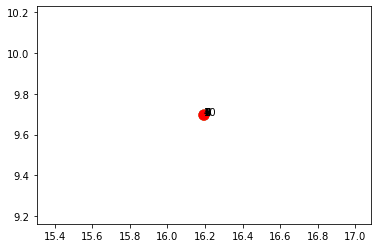

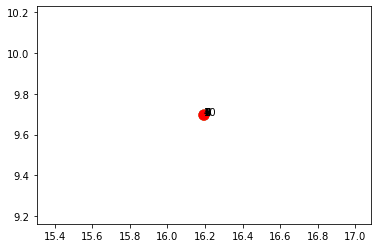

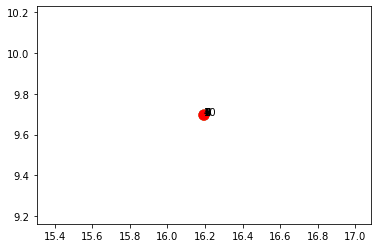

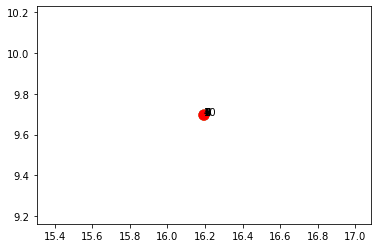

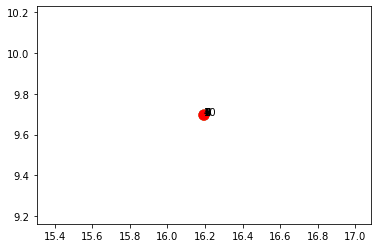

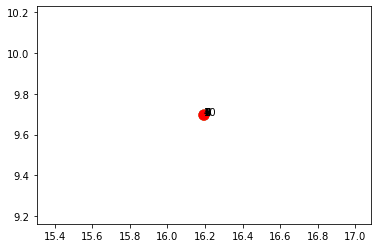



 convergence 
 [0.10879008 0.08958854 0.08655353 0.09817127 0.10903448 0.11355227
 0.07843115 0.11119098 0.11582073 0.08886697]


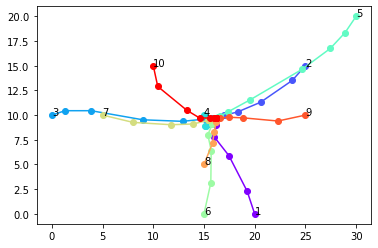

In [73]:
with open("initialCondition.pkl",'rb') as f :
    x,y = pickle.load(f)
    
M = positionToAdjMatrix(x,y,r_det)

camera = Camera(plt.figure())

#main
X = []
Y = []

AA = [[0 for i in range(n)] for j in range(n)]

for t in range(k):
    
    X.extend(x)
    Y.extend(y)
    
    a = np.array(X).reshape(t+1,n)
    b = np.array(Y).reshape(t+1,n)
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    
    #show_graph_with_labels(np.array(M))
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    x,y = mouvement(x,y,A)
    
    AA = A
    plt.pause(1.1)
    camera.snap()
    
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

#print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)

anim = camera.animate(blit=True)


In [72]:
print("\n matrice adjacence \n", H)


print("\n\n laplacienne \n", L)


print("\n\n P \n",P)


 matrice adjacence 
 [[0 0 0 1 0 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 0 1 1 1 1 1]
 [0 1 0 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 1 1 0]
 [0 0 1 1 0 1 0 1 0 1]
 [1 1 0 1 0 1 1 0 1 1]
 [1 1 0 1 1 1 0 1 0 0]
 [0 0 1 1 0 0 1 1 0 0]]


 laplacienne 
 [[ 1.          0.          0.         -0.25        0.         -0.25
   0.         -0.25       -0.25        0.        ]
 [ 0.          1.          0.         -0.25       -0.25        0.
   0.         -0.25       -0.25        0.        ]
 [ 0.          0.          1.          0.          0.          0.
  -0.5         0.          0.         -0.5       ]
 [-0.14285714 -0.14285714  0.          1.          0.         -0.14285714
  -0.14285714 -0.14285714 -0.14285714 -0.14285714]
 [ 0.         -0.5         0.          0.          1.          0.
   0.          0.         -0.5         0.        ]
 [-0.2         0.          0.         -0.2         0.          1.
  -0.2        -0.2        -0.2         0.        ]
 [ 0.          0. 

In [63]:
print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k-1])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k-1])

Prédiction de l'abscice final
 15.932192862905575

 Abscisse final de chaque agent :  
 [15.770852 15.770852 15.770852 15.770852 15.770852 15.770852 15.770852
 15.770852 15.770852 15.770852]

Prédiction de l'ordonné final
 9.47662839423727

 Ordonné final de chaque agent :  
 [10.11699177 10.11699177 10.11699177 10.11699177 10.11699177 10.11699177
 10.11699177 10.11699177 10.11699177 10.11699177]
